# Spam Detecion using Naive Bayes classifier

## 1. Defining the Question

### a) Specifying the Question

Creating a Naive Bayes model than can be use to make prediction on Spambase dataset

### b) Defining the Metric for Success

The model shoould have an accuracy level of 80% and above

### c) Understanding the context

**Data Set Information:**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

### d). Recording the Experimental Design

We will use exploratory data analysis, such as Univariate and Bivariate in this study to determine the relationships and differences between different variables. We'll also use Naive Bayes model to make prediction.

### e) Data Relevance

The dataset to use for this project can be found by following this link: https://archive.ics.uci.edu/ml/datasets/Spambase

## 2. Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
from scipy.stats import norm
pd.get_option("display.max_columns")

20

## 3. Reading the Data

In [8]:
# Getting the dataset from the website

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

spam = pd.read_csv(url, header=None)

### Checking the data

In [9]:
# Checking the top 5 rows of the dataset

spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [70]:
# Checking the bottom 5 rows of the dataset

spam.tail()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [12]:
# Checking the shape of the dataset

spam.shape

(4601, 58)

The dataset has 4601 rows and 58 columns

In [13]:
# Checking the columns of the dataset

spam.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [14]:
# Decribing the dataset

spam.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## 4. Tidying the Dataset

### a). Checking for the Null Values

In [15]:
total_missing_train = spam.isnull().sum().sort_values(ascending=False)
percentage = (spam.isnull().sum()/spam.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total_missing_train,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
0,0,0.0
43,0,0.0
31,0,0.0
32,0,0.0
33,0,0.0
34,0,0.0
35,0,0.0
36,0,0.0
37,0,0.0
38,0,0.0


From the above, we can see that there are no missing values in the dataset

### b). Checking for Duplicates

In [16]:
spam.duplicated().sum()

391

We shall proceed to drop the duplicate records to avoid inconsitency in the data

In [17]:
# Dropping the duplicated rows

spam = spam.drop_duplicates()

### c). Checking the Datatypes

In [18]:
spam.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object

## 5. Exploratory Data Analysis (EDA)

### a). Univariate Analysis

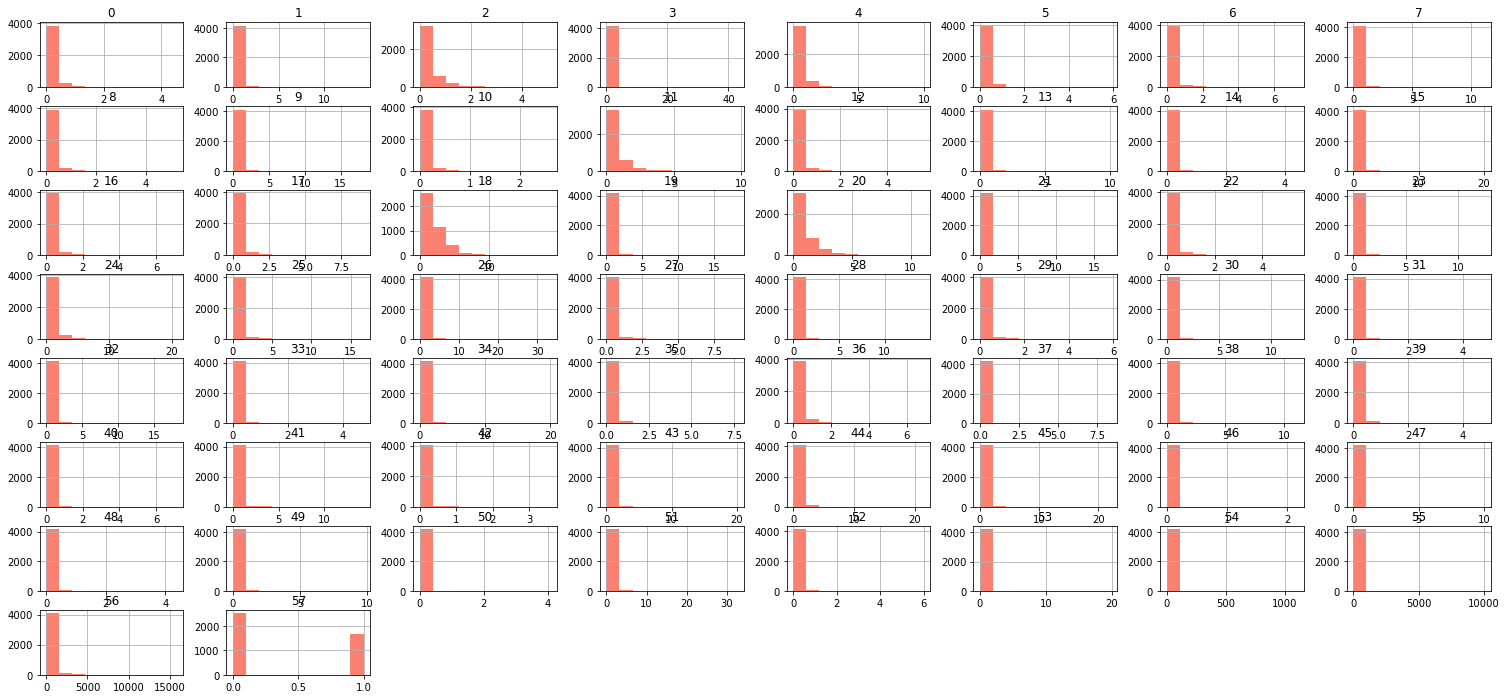

In [25]:
# Plots for data distribution

spam.hist(bins=10, figsize=[26,12], color = 'salmon')
plt.show()

### ii). Bivariate Analysis

In [67]:
# Checking the correlation between the features

spam.corr()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,...,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
1,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,...,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
2,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,...,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
3,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,...,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
4,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,...,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
5,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,...,-0.021744,-0.011584,-0.016729,0.058121,0.105927,0.020413,-0.013554,0.065709,0.063403,0.212311
6,0.011061,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,...,-0.034080,-0.061318,-0.029466,0.050992,0.067236,0.049306,0.039174,0.050825,-0.017081,0.334456
7,-0.004370,0.013706,0.007221,0.003801,0.023411,0.079704,0.033692,1.000000,0.106890,0.079045,...,-0.028976,-0.042751,-0.021383,0.029031,0.053569,-0.008121,0.009977,0.035603,0.036895,0.200666
8,0.103842,0.053426,0.077561,-0.001040,0.014483,0.097037,0.049238,0.106890,1.000000,0.123366,...,-0.015004,-0.037377,0.017321,0.035937,0.152457,-0.002075,0.110788,0.166299,0.233198,0.221454
9,0.040829,0.184304,0.025138,-0.003845,0.027233,0.010099,0.055695,0.079045,0.123366,1.000000,...,0.006772,-0.004960,0.003800,0.031602,0.077405,0.034482,0.073128,0.101546,0.078587,0.131686


In [71]:
# Checking if the features are normally distributed

spam.skew()

0      5.869855
1     13.464664
2      2.980623
3     27.209539
4      4.696946
5      6.122653
6      6.808707
7      9.734232
8      5.284306
9      8.568579
10     5.078281
11     2.828005
12     6.889952
13    11.564142
14     7.513375
15     9.387745
16     5.567668
17     5.453867
18     1.524251
19    15.430174
20     2.245707
21     9.541533
22     5.859524
23    15.556682
24     5.638834
25     6.297471
26     9.481582
27     6.517998
28    11.683591
29     6.380831
30    13.514852
31    10.432463
32    13.069355
33    10.339838
34    16.001762
35     7.358775
36     5.126620
37    27.078694
38    11.762303
39     9.101847
40    11.468806
41     9.185157
42     7.408226
43    18.196824
44     8.917866
45    10.077034
46    19.298485
47    18.871757
48    13.355885
49    14.002666
50    21.271982
51    18.337278
52    10.608970
53    31.500180
54    22.760655
55    31.205495
56     8.801641
57     0.413450
dtype: float64

We can see most of the features are positively skewed

## 6. Implementing the Solution

We shall implement the solution using the Naive Bayes model. This type of classifier model makes the assumption of normal distribution.

In [42]:
# Creating the X and y variables

X = spam.drop(columns = [57], axis = 1)
y = spam[57]

### i). Splitting the data into 80:20 train and test data

In [38]:
# Splitting the dataset into training and testing sets using test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Scaling the data

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [56]:
# Predicting our test predictors
y_pred = model.predict(X_test)
print({'Actual': y_test, 'Predicted': y_pred})

{'Actual': 1156    1
157     1
2549    0
199     1
2770    0
       ..
2668    0
3757    0
3868    0
421     1
3730    0
Name: 57, Length: 1263, dtype: int64, 'Predicted': array([1, 1, 0, ..., 0, 1, 0], dtype=int64)}


In [50]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[363 120]
 [ 11 348]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       483
           1       0.74      0.97      0.84       359

    accuracy                           0.84       842
   macro avg       0.86      0.86      0.84       842
weighted avg       0.87      0.84      0.84       842



We can see the model has an accuracy of 84%, this is not bad.

### ii). Splitting the data into 70:30 train and test data

In [51]:
# Splitting the dataset into training and testing sets using test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [52]:
# Scaling the data

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Training our model

clf = GaussianNB()

model = clf.fit(X_train, y_train)

In [55]:
# Predicting our test predictors

y_pred = model.predict(X_test)

print({'Actual': y_test, 'Predicted': y_pred})

{'Actual': 1156    1
157     1
2549    0
199     1
2770    0
       ..
2668    0
3757    0
3868    0
421     1
3730    0
Name: 57, Length: 1263, dtype: int64, 'Predicted': array([1, 1, 0, ..., 0, 1, 0], dtype=int64)}


In [57]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[547 193]
 [ 22 501]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       740
           1       0.72      0.96      0.82       523

    accuracy                           0.83      1263
   macro avg       0.84      0.85      0.83      1263
weighted avg       0.86      0.83      0.83      1263



The model has an accuracy of 83% which is a bit lower than when we use the 80:20 partition

### iii). Splitting the data into 60:40 train and test data

In [58]:
# Splitting the dataset into training and testing sets using test_size = 0.4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [59]:
# Scaling the data

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Training our model

clf = GaussianNB()

model = clf.fit(X_train, y_train)

In [61]:
# Predicting our test predictors

y_pred = model.predict(X_test)

print({'Actual': y_test, 'Predicted': y_pred})

{'Actual': 1156    1
157     1
2549    0
199     1
2770    0
       ..
4488    0
1781    1
3400    0
3153    0
3222    0
Name: 57, Length: 1684, dtype: int64, 'Predicted': array([1, 1, 0, ..., 0, 0, 0], dtype=int64)}


In [62]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[729 259]
 [ 40 656]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       988
           1       0.72      0.94      0.81       696

    accuracy                           0.82      1684
   macro avg       0.83      0.84      0.82      1684
weighted avg       0.85      0.82      0.82      1684



The model performs even lower at the 60:40 training/test ratio at 82%

### Optimizing the Model by removing features with Zeros

In [98]:
# Dropping the columns with Zeros

spam = spam.replace(0, np.nan)
spam = spam.dropna(how='all', axis=0)
spam = spam.replace(np.nan, 0)

In [99]:
# Creating the X and y variables

X = spam.drop(columns = [57], axis = 1)
y = spam[57]

In [100]:
# Splitting the dataset into training and testing sets using test_size = 0.2 since the model performed well on the first splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
# Scaling the data

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
# Training our model

clf = GaussianNB()

clf.fit(X_train, y_train)

GaussianNB()

In [103]:
# Predicting our test predictors

y_pred = clf.predict(X_test)

print({'Actual': y_test, 'Predicted': y_pred})

{'Actual': 1156    1.0
157     1.0
2549    0.0
199     1.0
2770    0.0
       ... 
708     1.0
4360    0.0
971     1.0
3974    0.0
2110    0.0
Name: 57, Length: 842, dtype: float64, 'Predicted': array([1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 

In [104]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[363 120]
 [ 11 348]]
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85       483
         1.0       0.74      0.97      0.84       359

    accuracy                           0.84       842
   macro avg       0.86      0.86      0.84       842
weighted avg       0.87      0.84      0.84       842



The model performs at 84%, which is good

## 7. Conclusion

We can clearly see that the model performs well on the first split of 80:20, with an accuracy level of 84%.

## 8. Follow up questions

### a) Did we have the right data?

Yes, the dataset available for this analysis was relevant to the research problem.

### b) Do we need other data to answer the research question?

No, the dataset provided had relevant and important information for the research question.

### c) Did we have the right question?

Yes, the research question was simple and specific enough.